In [1]:
import numpy as np
import rebound

sim = rebound.Simulation()
sim.G = 4*np.pi**2
sim.add(m=1.)
sim.add(m=1.e-3, a=1.)
sim.add(m=1.e-3, P=2.2)
sim.move_to_com()

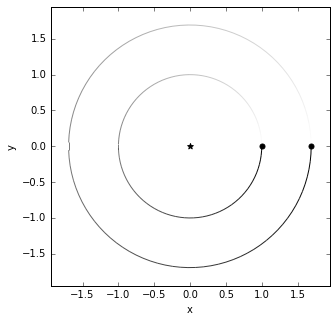

In [2]:
%matplotlib inline
fig = rebound.OrbitPlot(sim, trails=True)

In [3]:
import reboundx
rebx = reboundx.Extras(sim)
rebx.add_modify_orbits_forces()

ps = sim.particles
ps[2].tau_a = -1000

In [4]:
times = np.linspace(0, -ps[2].tau_a, 1000)
Pratio = np.zeros(1000)
for i, time in enumerate(times):
    sim.integrate(time)
    Pratio[i] = ps[2].P/ps[1].P

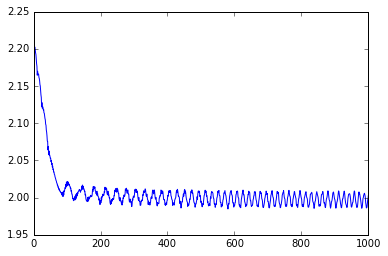

In [5]:
import matplotlib.pyplot as plt
plt.plot(times, Pratio)

In [6]:
import rebound
import numpy as np
import reboundx
def run(tau_a):
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2
    sim.add(m=1.)
    sim.add(m=1.e-3, a=1.)
    sim.add(m=1.e-3, P=2.2)
    sim.move_to_com()
    rebx = reboundx.Extras(sim)
    params = rebx.add_modify_orbits_forces()

    ps = sim.particles
    ps[2].tau_a = tau_a
    times = np.linspace(0, -ps[2].tau_a, 1000)
    Pratio = np.zeros(1000)
    for i, time in enumerate(times):
        sim.integrate(time)
        Pratio[i] = ps[2].P/ps[1].P
    return [times, Pratio]

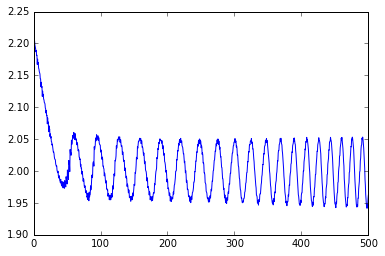

In [7]:
times, Pratio = run(-500)
plt.plot(times, Pratio)